# Filtro de Kalman

Funções de cálculo das distâncias medidas pelos sensores.

$dF (x, y, \theta) = \begin{matrix} \frac{|Sy - Yp|}{|\cos(\theta)|}, & 0 \le \theta \lt \frac{\pi}{2}  \\ 
          \frac{|Sx - Xp|}{|\sin(\theta)|}, & \frac{\pi}{2} \le \theta \lt \pi \\
          \frac{Yp}{|\cos(\theta)|}, & \pi \le \theta \lt \frac{3\pi}{2}  \\ 
          \frac{Xp}{|\sin(\theta)|}, & \frac{3\pi}{2} \le \theta \lt 2\pi
           \end{matrix} $

$dR (x, y, \theta) = \begin{matrix} \frac{|Sx - Xp|}{|\cos(\theta)|}, & 0 \le \theta \lt \frac{\pi}{2}  \\ 
          \frac{Yp}{|\sin(\theta)|}, & \frac{\pi}{2} \le \theta \lt \pi \\
          \frac{Xp}{|\cos(\theta)|}, & \pi \le \theta \lt \frac{3\pi}{2}  \\ 
          \frac{|Sy - Yp|}{|\sin(\theta)|}, & \frac{3\pi}{2} \le \theta \lt 2\pi
           \end{matrix} $

$dL (x, y, \theta) = \begin{matrix} \frac{Xp}{|\cos(\theta)|}, & 0 \le \theta \lt \frac{\pi}{2}  \\ 
          \frac{|Sy - Yp|}{|\sin(\theta)|}, & \frac{\pi}{2} \le \theta \lt \pi \\
          \frac{Sx - Xp}{|\cos(\theta)|}, & \pi \le \theta \lt \frac{3\pi}{2}  \\ 
          \frac{Yp}{|\sin(\theta)|}, & \frac{3\pi}{2} \le \theta \lt 2\pi
           \end{matrix} $

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

In [75]:
def determinarDF(x, y, theta, Sx, Sy):
    dF = 0
    if theta >= 0 and theta < np.pi / 2:
        dF = (Sy - y) / np.abs(np.cos(theta)) 
    elif theta >= np.pi / 2 and theta < np.pi:
        dF = (Sx - x) / np.abs(np.sin(theta))
    elif theta >= np.pi and theta < 3*np.pi/2:
        dF = (y) / np.abs(np.cos(theta)) 
    elif theta >= 3 * np.pi / 2 and theta < 2 * np.pi:
        dF = (x) / np.abs(np.sin(theta))        
    return dF

def determinarDL(x, y, theta, Sx, Sy):
    dL = 0
    if theta >= 0 and theta < np.pi / 2:
        dL = (x) / np.abs(np.cos(theta)) 
    elif theta >= np.pi / 2 and theta < np.pi:
        dL = (Sy - y) / np.abs(np.sin(theta))
    elif theta >= np.pi and theta < 3*np.pi/2:
        dL = (Sx - x) / np.abs(np.cos(theta)) 
    elif theta >= 3 * np.pi / 2 and theta < 2 * np.pi:
        dL = (y) / np.abs(np.sin(theta))        
    return dL

def determinarDR(x, y, theta, Sx, Sy):
    dR = 0
    if theta >= 0 and theta < np.pi / 2:
        dR = (Sx - x) / np.abs(np.cos(theta)) 
    elif theta >= np.pi / 2 and theta < np.pi:
        dR = (y) / np.abs(np.sin(theta))
    elif theta >= np.pi and theta < 3*np.pi/2:
        dR = (x) / np.abs(np.cos(theta)) 
    elif theta >= 3 * np.pi / 2 and theta < 2 * np.pi:
        dR = (Sy - y) / np.abs(np.sin(theta))        
    return dR

    
def determinarMatrizH(x, y, theta, Sx, Sy):
    if theta >= 0 and theta < np.pi / 2:
        H = np.array([[0, -1/np.abs(np.cos(theta)), 0, 0, (((Sy - y)*np.tan(theta)) / np.abs(np.cos(theta)))],
                       [1/np.abs(np.cos(theta)), 0, 0, 0, (((x)*np.tan(theta)) / np.abs(np.cos(theta)))],
                       [-1/np.abs(np.cos(theta)), 0, 0, 0,(((Sx - x)*np.tan(theta)) / np.abs(np.cos(theta)))]])
    elif theta >= np.pi / 2 and theta < np.pi:
        H = np.array([[-1/np.abs(np.sin(theta)), 0, 0, 0, ((-(Sx - x)*np.cos(theta)) / (np.sin(theta) * np.abs(np.sin(theta))))],
                       [0, -1/np.abs(np.sin(theta)), 0, 0, ((-(Sy - y)*np.cos(theta)) / (np.sin(theta) * np.abs(np.sin(theta))))],
                       [0, 1/np.abs(np.sin(theta)),  0, 0, ((-(y)*np.cos(theta)) / (np.sin(theta) * np.abs(np.sin(theta))))]])
    elif theta >= np.pi and theta < 3*np.pi/2:
        H = np.array([[0, 1/np.abs(np.cos(theta)), 0, 0, (((y)*np.tan(theta)) / np.abs(np.cos(theta)))],
                       [-1/np.abs(np.cos(theta)), 0, 0, 0, (((Sx - x)*np.tan(theta)) / np.abs(np.cos(theta)))],
                       [1/np.abs(np.cos(theta)), 0, 0, 0, (((x)*np.tan(theta)) / np.abs(np.cos(theta)))]])
    elif theta >= 3 * np.pi / 2 and theta < 2 * np.pi:
        H = np.array([[1/np.abs(np.sin(theta)), 0, 0, 0, ((-(x)*np.cos(theta)) / (np.sin(theta) * np.abs(np.sin(theta))))],
                      [0, 1/np.abs(np.sin(theta)), 0, 0, ((-(y)*np.cos(theta)) / (np.sin(theta) * np.abs(np.sin(theta))))], 
                      [0, -1/np.abs(np.sin(theta)),  0, 0, ((-(Sy - y)*np.cos(theta)) / (np.sin(theta) * np.abs(np.sin(theta))))]])
    return H

In [76]:
def handlePosicao(posicao_atual):
    posicao = []
    for elem in posicao_atual:
        aux = elem[0, 0]
        posicao.append(aux)
    return posicao

In [77]:
def filtroDeKalman(posicao_anterior, deltaT, u_k, P, distancias_lidas):
    x_kmenos1, y_kmenos1, vx_kmenos1, vy_kmenos1, theta_kmenos1 = posicao_anterior[0], posicao_anterior[1], posicao_anterior[2], posicao_anterior[3], posicao_anterior[4] 
    aceleracao_medida, velocidade_angular = u_k[0], u_k[1]
    alpha = theta_kmenos1 + (deltaT*velocidade_angular) 
    deltaX = (1/2 * (deltaT ** 2) * aceleracao_medida  + vx_kmenos1*deltaT) * np.cos(alpha)
    deltaY = (1/2 * (deltaT ** 2) * aceleracao_medida + vy_kmenos1*deltaT) * np.sin(alpha)
    deltaVx = aceleracao_medida * deltaT * np.cos(alpha)
    deltaVy = aceleracao_medida * deltaT * np.sin(alpha)
    deltaTheta = deltaT * velocidade_angular
    posicao_predita = np.array([posicao_anterior]).transpose() + np.array([[deltaX],
                                                                            [deltaY],
                                                                            [deltaVx],
                                                                            [deltaVy],
                                                                            [deltaTheta]])
    F_p = np.array([[1, 0, deltaT * np.cos(alpha), 0, ((-1/2 * (deltaT ** 2) * aceleracao_medida - vx_kmenos1 * deltaT) * np.sin(alpha))],
                     [0, 1, 0, deltaT * np.sin(alpha), ((1/2 * (deltaT ** 2) * aceleracao_medida + vy_kmenos1 * deltaT) * np.cos(alpha))],
                     [0, 0, 1, 0, (-1)*(aceleracao_medida * deltaT * np.sin(alpha))],
                     [0, 0, 0, 1, (aceleracao_medida * deltaT * np.cos(alpha))],
                     [0, 0, 0, 0, 1]])
    
    F_u = np.array([[1/2 * (deltaT ** 2) * np.cos(alpha), 
                        ((-1/2 * (deltaT ** 3) * aceleracao_medida) - (vx_kmenos1 * (deltaT ** 2))) * np.sin(alpha)],
                     [1/2 * (deltaT ** 2) * np.sin(alpha),
                         ((1/2 * (deltaT ** 3) * aceleracao_medida) + (vy_kmenos1 * (deltaT ** 2))) * np.cos(alpha)],
                     [deltaT * np.cos(alpha), (-1)*(aceleracao_medida * deltaT * np.sin(alpha))],
                     [deltaT * np.sin(alpha), (aceleracao_medida * deltaT * np.cos(alpha))],
                     [0, deltaT]])
    
    Q = np.array([[0.00000784, 0],
                   [0, 0.00000038551681]])

    P_predito = (F_p.dot(P)).dot(F_p.transpose()) + (F_u.dot(Q)).dot(F_u.transpose())
    Sx, Sy = 1, 1
    theta = posicao_predita[4][0]
    if theta < 0:
        theta = theta + (np.ceil(np.abs(theta) / (2*np.pi)) * 2*np.pi)
    if theta > 2*np.pi:
        theta = theta - (np.floor(theta / (2*np.pi)) * 2*np.pi)
    
    
    hDF = determinarDF(posicao_predita[0][0], posicao_predita[1][0], theta, Sx, Sy)
    hDR = determinarDR(posicao_predita[0][0], posicao_predita[1][0], theta, Sx, Sy)
    hDL = determinarDL(posicao_predita[0][0], posicao_predita[1][0], theta, Sx, Sy)
    funcaoH = [hDF, hDL, hDR]
    Vk = np.array([distancias_lidas]).transpose() - np.array([funcaoH]).transpose()
    Hm = determinarMatrizH(posicao_predita[0][0], posicao_predita[1][0], theta, Sx, Sy)
    Rk = np.array([[0.01, 0, 0],
                   [0, 0.01, 0],
                   [0, 0, 0.01]])
    Sk = (Hm.dot(P_predito)).dot(Hm.transpose()) + Rk
    if np.linalg.det(Sk) == 0:
        novoSk = Sk + np.array([[0.01, 0, 0],
                                [0, 0.01, 0],
                                [0, 0, 0.01]])
        inversoSk = np.linalg.inv(novoSk) 
    else:
        inversoSk = np.linalg.inv(Sk)
    Kk = (P_predito.dot(Hm.transpose())).dot(inversoSk) 
    posicao_atual = posicao_predita + (Kk.dot(Vk))
    P_atual = P_predito + ((Kk.dot(Sk)).dot(Kk.transpose()))
    novaPosicao = handlePosicao(posicao_atual)
    if novaPosicao[0] > 1 or novaPosicao[0] < 0:
        novaPosicao[0] = x_kmenos1
    if novaPosicao[1] > 1 or novaPosicao[1] < 0:
        novaPosicao[1] = y_kmenos1
    if novaPosicao[4] > 2*np.pi or novaPosicao[4] < 0:
        novaPosicao[4] = theta_kmenos1
    return novaPosicao, P_atual

# Teste 1

In [78]:
distances = []
accel = []
gyros = []
df = []
dl = []
dr = []
arquivoDist = open("arqDist11.txt","r")
arquivoAc = open("arqAccel11.txt","r")
arquivoGyro = open("arqGyro11.txt","r")

for distPonteiro, acPonteiro, gyroPonteiro in zip(arquivoDist, arquivoAc, arquivoGyro):    
    arrDist = distPonteiro.split(";")
    distances.append([int(arrDist[0]) / 1000, int(arrDist[1]) / 1000, int(arrDist[2]) / 1000])
    accel.append(float(acPonteiro))
    gyros.append(-1 * float(gyroPonteiro))
    df.append(int(arrDist[0]) / 1000)
    dl.append(int(arrDist[1]) / 1000 + 0.07)
    dr.append(int(arrDist[2]) / 1000 + 0.07)
arquivoDist.close()
arquivoAc.close()
arquivoGyro.close()

data = {'Index': range(len(distances)), 'Aceleração': accel, 'Giro': gyros, 'Dist. Frontal': df, 'Dist. Esquerda': dl, 'Dist. Direita': dr}
dataframe = pd.DataFrame(data)
dataframe

,Index,Aceleração,Giro,Dist. Frontal,Dist. Esquerda,Dist. Direita
0,0,0.15,0.01,0.689,0.148,0.507
1,1,0.15,0.01,0.693,0.148,0.511
2,2,0.14,0.01,0.690,0.148,0.515
3,3,0.15,0.01,0.692,0.147,0.505
4,4,0.15,0.01,0.691,0.148,0.514
...,...,...,...,...,...,...
109,109,0.06,0.01,0.051,0.153,0.479
110,110,0.07,0.01,0.051,0.150,0.483
111,111,0.07,0.01,0.050,0.152,0.477
112,112,0.07,0.01,0.051,0.150,0.484


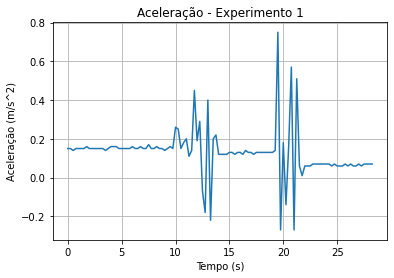

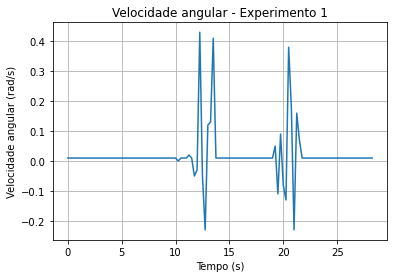

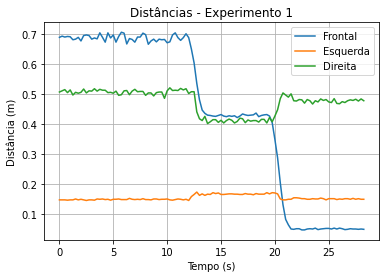

In [79]:
tempo = [x * 0.25 for x in dataframe['Index']]
plt.title('Aceleração - Experimento 1')
plt.plot(tempo, dataframe['Aceleração'])
plt.xlabel('Tempo (s)')
plt.ylabel('Aceleração (m/s^2)')
plt.grid()
plt.show()

plt.title('Velocidade angular - Experimento 1')
plt.plot(tempo, dataframe['Giro'])
plt.grid()
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade angular (rad/s)')
plt.show()

plt.title('Distâncias - Experimento 1')
plt.plot(tempo, dataframe['Dist. Frontal'], label = 'Frontal')
plt.plot(tempo, dataframe['Dist. Esquerda'], label = 'Esquerda')
plt.plot(tempo, dataframe['Dist. Direita'], label = 'Direita')
plt.grid()
plt.xlabel('Tempo (s)')
plt.ylabel('Distância (m)')
plt.legend()
plt.show()

In [80]:
P_atual = np.matrix([[0.1, 0, 0, 0, 0], [0, 0.1, 0, 0, 0], [0, 0, 0.1, 0, 0], [0, 0, 0, 0.1, 0], [0, 0, 0, 0, 0.1]])
posicao_atual = [0.2, 0.2, 0, 0, 0]
deltaT = 0.25
posX = [posicao_atual[0]]
posY = [posicao_atual[1]]
vX = [posicao_atual[2]]
vY = [posicao_atual[3]]
theta = [posicao_atual[4]]
index = 0
for ac, gy, di in zip(accel, gyros, distances):
    index += 1
    ac = ac - 0.07
    print(f'Aceleração - {ac}\n')
    print(f'Giro - {gy}\n')
    print(f'Index: {index}\n')
    posicao_atual, P_atual = filtroDeKalman(posicao_atual, deltaT, [ac, gy], P_atual, di)
    print(f'Estado atual: {posicao_atual}')
    print("***********************************************************************\n\n")
    print(f'P atual: {P_atual}')
    print("***********************************************************************\n\n")
    posX.append(posicao_atual[0])
    posY.append(posicao_atual[1])
    vX.append(posicao_atual[2])
    vY.append(posicao_atual[3])
    theta.append(posicao_atual[4])
    

Aceleração - 0.07999999999999999

Giro - 0.01

Index: 1

Estado atual: [0.31519286953459247, 0.3008992176267356, 0.04651619434528107, -8.761571807248313e-06, 0]
***********************************************************************


P atual: [[ 2.07724634e-01 -1.48317602e-07  4.88763695e-02 -1.44471955e-06
  -7.22521278e-05]
 [-1.48317602e-07  1.90910052e-01 -4.89530471e-08  1.25227351e-04
   2.95460736e-04]
 [ 4.88763695e-02 -4.89530471e-08  1.05618462e-01 -4.35808116e-07
  -2.18535903e-05]
 [-1.44471955e-06  1.25227351e-04 -4.35808116e-07  1.00040038e-01
   2.00008805e-03]
 [-7.22521278e-05  2.95460736e-04 -2.18535903e-05  2.00008805e-03
   1.00003222e-01]]
***********************************************************************


Aceleração - 0.07999999999999999

Giro - 0.01

Index: 2

Estado atual: [0.31872012285465057, 0.3066871235636134, 0.06317353052784833, -0.00019305530117488885, 0]
***********************************************************************


P atual: [[ 4.726303

Estado atual: [0.31350000000000033, 0.5878462208937978, 1043810.9056174348, -372.0742841182202, 0.5668077174566449]
***********************************************************************


P atual: [[ 5.74177223e+23  3.67158158e+20 -4.49293725e+19 -1.80248725e+18
  -3.12989340e+17]
 [ 3.67157889e+20  2.71619939e+17 -3.05027615e+16 -1.10301706e+15
  -1.99473326e+14]
 [-4.49248019e+19 -3.05033591e+16  4.47820998e+15  1.32558384e+14
   1.97850214e+13]
 [-1.80247350e+18 -1.10302498e+15  1.32702749e+14  5.84040404e+12
   1.07243773e+12]
 [-3.12998526e+17 -1.99473160e+14  1.97864140e+13  1.07272000e+12
   2.39407235e+11]]
***********************************************************************


Aceleração - 0.04999999999999999

Giro - 0.01

Index: 59

Estado atual: [0.31350000000000033, 0.5878462208937978, 1043898.6714772389, -372.69910512012893, 0.5668077174566449]
***********************************************************************


P atual: [[ 1.33024955e+24  8.41673231e+20 -9.509862

Estado atual: [0.31350000000000033, 0.5878462208937978, 1053796.3556815342, -352.3722413965649, 0.5668077174566449]
***********************************************************************


P atual: [[ 2.20046080e+42  3.00308731e+38 -2.27082577e+36  4.08644357e+34
  -1.11254803e+35]
 [ 3.00237220e+38  8.31467244e+34 -1.00673258e+33 -1.69772347e+31
  -1.88120110e+31]
 [-2.27687249e+36 -1.00423504e+33  1.73037449e+31  2.37090557e+29
   1.06522187e+29]
 [ 4.11499665e+34 -1.70619302e+31  2.01498225e+29  2.10236469e+28
   3.83183592e+27]
 [-1.10964846e+35 -1.88398507e+31  1.09406543e+29  3.01856786e+27
   7.85409510e+27]]
***********************************************************************


Aceleração - 0.0

Giro - 0.01

Index: 111

Estado atual: [0.31350000000000033, 0.5878462208937978, 1053815.790317313, -353.51362371583554, 0.030457352162734153]
***********************************************************************


P atual: [[ 5.36011440e+42  6.81004821e+38 -6.09538633e+36  5.6772

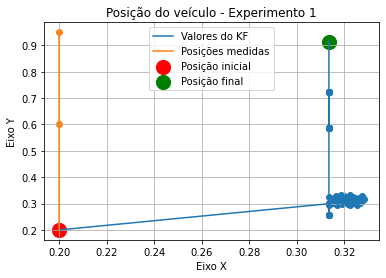

Erro absoluto - Eixo X: 0.11350000000000032
Erro absoluto - Eixo Y: 0.03544255774784966


In [81]:
valoresX = [0.2, 0.2, 0.2]
valoresY = [0.2, 0.6, 0.95]
plt.plot(posX, posY, label='Valores do KF')
plt.plot(valoresX, valoresY, label='Posições medidas')
plt.ylabel('Eixo Y')
plt.xlabel('Eixo X')
plt.title('Posição do veículo - Experimento 1')
plt.scatter(posX, posY)
plt.scatter(valoresX, valoresY)
plt.scatter(posX[0], posY[0], color='red', s=200, label='Posição inicial')
plt.scatter(posX[-1], posY[-1], color='green', s=200, label='Posição final')
plt.legend()
plt.grid()
plt.show()
print(f'Erro absoluto - Eixo X: {np.abs(valoresX[-1] - posX[-1])}')
print(f'Erro absoluto - Eixo Y: {np.abs(valoresY[-1] - posY[-1])}')

# Teste 2

In [82]:
distances = []
accel = []
gyros = []
df = []
dl = []
dr = []
arquivoDist = open("arqDist12.txt","r")
arquivoAc = open("arqAccel12.txt","r")
arquivoGyro = open("arqGyro12.txt","r")

for distPonteiro, acPonteiro, gyroPonteiro in zip(arquivoDist, arquivoAc, arquivoGyro):    
    arrDist = distPonteiro.split(";")
    distances.append([int(arrDist[0]) / 1000, int(arrDist[1]) / 1000, int(arrDist[2]) / 1000])
    ac = float(acPonteiro)
    if ac > 10:
        ac = ac / 100
    accel.append(ac)
    gyros.append(-1 * float(gyroPonteiro))
    df.append(int(arrDist[0]) / 1000)
    dl.append(int(arrDist[1]) / 1000 + 0.07)
    dr.append(int(arrDist[2]) / 1000 + 0.07)
arquivoDist.close()
arquivoAc.close()
arquivoGyro.close()

data = {'Index': range(len(distances)), 'Aceleração': accel, 'Giro': gyros, 'Dist. Frontal': df, 'Dist. Esquerda': dl, 'Dist. Direita': dr}
dataframe = pd.DataFrame(data)
dataframe

,Index,Aceleração,Giro,Dist. Frontal,Dist. Esquerda,Dist. Direita
0,0,0.08,0.01,0.701,0.711,0.154
1,1,0.07,0.01,0.695,0.693,0.155
2,2,0.06,0.01,0.684,0.708,0.153
3,3,0.07,0.01,0.695,0.703,0.156
4,4,0.07,0.01,0.688,0.714,0.154
...,...,...,...,...,...,...
119,119,0.00,1.02,0.033,0.722,0.163
120,120,0.00,1.02,0.033,0.737,0.163
121,121,0.00,1.02,0.032,0.731,0.161
122,122,0.00,1.02,0.032,0.718,0.165


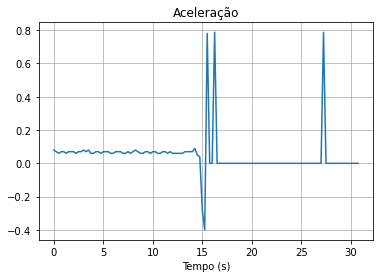

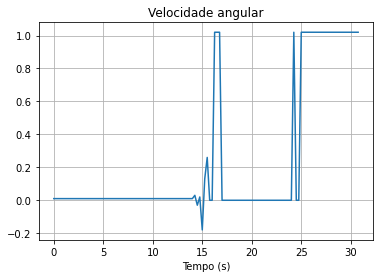

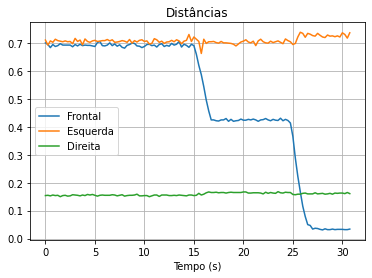

In [83]:
tempo = [x * 0.25 for x in dataframe['Index']]
plt.title('Aceleração')
plt.plot(tempo, dataframe['Aceleração'])
plt.grid()
plt.xlabel('Tempo (s)')
plt.show()

plt.title('Velocidade angular')
plt.plot(tempo, dataframe['Giro'])
plt.grid()
plt.xlabel('Tempo (s)')
plt.show()

plt.title('Distâncias')
plt.plot(tempo, dataframe['Dist. Frontal'], label = 'Frontal')
plt.plot(tempo, dataframe['Dist. Esquerda'], label = 'Esquerda')
plt.plot(tempo, dataframe['Dist. Direita'], label = 'Direita')
plt.grid()
plt.xlabel('Tempo (s)')
plt.legend()
plt.show()

In [84]:
P_atual = np.matrix([[0.1, 0, 0, 0, 0], [0, 0.1, 0, 0, 0], [0, 0, 0.1, 0, 0], [0, 0, 0, 0.1, 0], [0, 0, 0, 0, 0.1]])
posicao_atual = [0.3, 0.1, 0, 0, np.pi/2]
deltaT = 0.25
posX = [posicao_atual[0]]
posY = [posicao_atual[1]]
vX = [posicao_atual[2]]
vY = [posicao_atual[3]]
theta = [posicao_atual[4]]
index = 0
for ac, gy, di in zip(accel, gyros, distances):
    index += 1
    print(f'Aceleração - {ac}\n')
    print(f'Giro - {gy}\n')
    print(f'Index: {index}\n')
    posicao_atual, P_atual = filtroDeKalman(posicao_atual, deltaT, [ac, gy], P_atual, di)
    print(f'Estado atual: {posicao_atual}')
    print("***********************************************************************\n\n")
    posX.append(posicao_atual[0])
    posY.append(posicao_atual[1])
    vX.append(posicao_atual[2])
    vY.append(posicao_atual[3])
    theta.append(posicao_atual[4])

Aceleração - 0.08

Giro - 0.01

Index: 1

Estado atual: [0.2990875037822805, 0.2161491873766993, 2.1382097019203333e-05, 0.046741086277920105, 1.5697558046089837]
***********************************************************************


Aceleração - 0.07

Giro - 0.01

Index: 2

Estado atual: [0.30470507300906835, 0.23097943167249274, 7.224868926237969e-05, 0.06454289393851222, 1.5700962055253456]
***********************************************************************


Aceleração - 0.06

Giro - 0.01

Index: 3

Estado atual: [0.3157037340877738, 0.22273579736253799, 0.00016922441182583756, 0.0709722681504951, 1.5700388504833154]
***********************************************************************


Aceleração - 0.07

Giro - 0.01

Index: 4

Estado atual: [0.30514325308470475, 0.22656146522405265, 0.0003157296667858574, 0.08341135382065724, 1.5701609739529678]
***********************************************************************


Aceleração - 0.07

Giro - 0.01

Index: 5

Estado atua

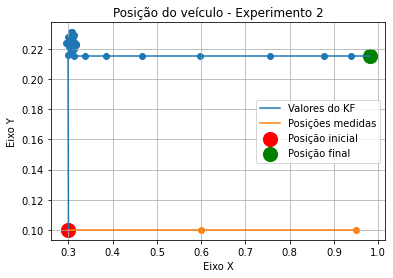

Erro absoluto - Eixo X: 0.03182797182538333
Erro absoluto - Eixo Y: 0.11524995743773556


In [85]:
valoresX = [0.3, 0.6, 0.95]
valoresY = [0.1, 0.1, 0.1]
plt.plot(posX, posY, label='Valores do KF')
plt.plot(valoresX, valoresY, label='Posições medidas')
plt.ylabel('Eixo Y')
plt.xlabel('Eixo X')
plt.title('Posição do veículo - Experimento 2')
plt.scatter(posX, posY)
plt.scatter(valoresX, valoresY)
plt.scatter(posX[0], posY[0], color='red', s=200, label='Posição inicial')
plt.scatter(posX[-1], posY[-1], color='green', s=200, label='Posição final')
plt.legend()
plt.grid()
plt.show()
print(f'Erro absoluto - Eixo X: {np.abs(valoresX[-1] - posX[-1])}')
print(f'Erro absoluto - Eixo Y: {np.abs(valoresY[-1] - posY[-1])}')

# Teste 3

In [86]:
distances = []
accel = []
gyros = []
df = []
dl = []
dr = []
arquivoDist = open("arqDist13.txt","r")
arquivoAc = open("arqAccel13.txt","r")
arquivoGyro = open("arqGyro13.txt","r")

for distPonteiro, acPonteiro, gyroPonteiro in zip(arquivoDist, arquivoAc, arquivoGyro):    
    arrDist = distPonteiro.split(";")
    distances.append([int(arrDist[0]) / 1000, int(arrDist[1]) / 1000, int(arrDist[2]) / 1000])
    accel.append(float(acPonteiro))
    gyros.append(-1 * float(gyroPonteiro))
    df.append(int(arrDist[0]) / 1000)
    dl.append(int(arrDist[1]) / 1000 + 0.07)
    dr.append(int(arrDist[2]) / 1000 + 0.07)
arquivoDist.close()
arquivoAc.close()
arquivoGyro.close()

data = {'Index': range(len(distances)), 'Aceleração': accel, 'Giro': gyros, 'Dist. Frontal': df, 'Dist. Esquerda': dl, 'Dist. Direita': dr}
dataframe = pd.DataFrame(data)
dataframe

,Index,Aceleração,Giro,Dist. Frontal,Dist. Esquerda,Dist. Direita
0,0,0.03,0.01,0.707,0.755,0.138
1,1,0.02,0.01,0.696,0.758,0.134
2,2,0.03,0.01,0.709,0.761,0.138
3,3,0.01,0.01,0.710,0.761,0.136
4,4,0.02,0.01,0.716,0.764,0.134
...,...,...,...,...,...,...
88,88,0.02,0.01,0.079,0.744,0.178
89,89,0.02,0.01,0.079,0.744,0.178
90,90,0.02,0.01,0.079,0.744,0.177
91,91,0.03,0.01,0.081,0.740,0.179


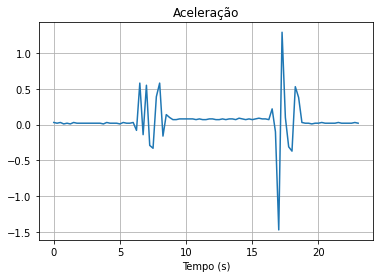

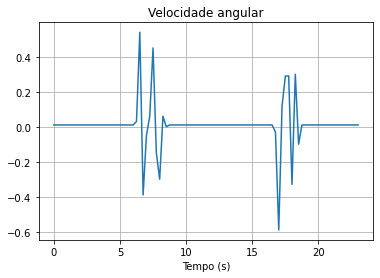

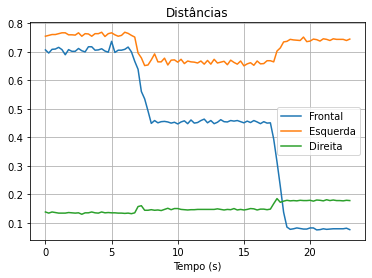

Erro absoluto - Eixo X: 0.03182797182538333
Erro absoluto - Eixo Y: 0.11524995743773556


In [87]:
tempo = [x * 0.25 for x in dataframe['Index']]
plt.title('Aceleração')
plt.plot(tempo, dataframe['Aceleração'])
plt.grid()
plt.xlabel('Tempo (s)')
plt.show()

plt.title('Velocidade angular')
plt.plot(tempo, dataframe['Giro'])
plt.grid()
plt.xlabel('Tempo (s)')
plt.show()

plt.title('Distâncias')
plt.plot(tempo, dataframe['Dist. Frontal'], label = 'Frontal')
plt.plot(tempo, dataframe['Dist. Esquerda'], label = 'Esquerda')
plt.plot(tempo, dataframe['Dist. Direita'], label = 'Direita')
plt.grid()
plt.xlabel('Tempo (s)')
plt.legend()
plt.show()
print(f'Erro absoluto - Eixo X: {np.abs(valoresX[-1] - posX[-1])}')
print(f'Erro absoluto - Eixo Y: {np.abs(valoresY[-1] - posY[-1])}')

In [88]:
P_atual = np.matrix([[0.1, 0.01, 0.01, 0.01, 0.1], [0.01, 0.1, 0, 0, 0.01], [0, 0, 0.1, 0, 0], [0, 0, 0, 0.1, 0], [0, 0, 0, 0, 0.1]])
posicao_atual = [0.1, 0.8, 0, 0, np.pi]
deltaT = 0.25
posX = [posicao_atual[0]]
posY = [posicao_atual[1]]
vX = [posicao_atual[2]]
vY = [posicao_atual[3]]
theta = [posicao_atual[4]]
index = 0
for ac, gy, di in zip(accel, gyros, distances):
    index += 1
    gy = gy - 0.01
    print(f'Aceleração - {ac}\n')
    print(f'Giro - {gy}\n')
    print(f'Index: {index}\n')
    posicao_atual, P_atual = filtroDeKalman(posicao_atual, deltaT, [ac, gy], P_atual, di)
    print(f'Estado atual: {posicao_atual}')
    print("***********************************************************************\n\n")
    posX.append(posicao_atual[0])
    posY.append(posicao_atual[1])
    vX.append(posicao_atual[2])
    vY.append(posicao_atual[3])
    theta.append(posicao_atual[4])

Aceleração - 0.03

Giro - 0.0

Index: 1

Estado atual: [0.1868261897868102, 0.7163051147443815, -0.030868993811774513, -6.542665110437394e-07, 3.141679889061541]
***********************************************************************


Aceleração - 0.02

Giro - 0.0

Index: 2

Estado atual: [0.1880813622241416, 0.6969940046842634, -0.0346228797751545, 1.8581077916566462e-07, 3.141595131181587]
***********************************************************************


Aceleração - 0.03

Giro - 0.0

Index: 3

Estado atual: [0.18857929271547527, 0.708669253125803, -0.03926924963455908, 4.5302594858968183e-07, 3.1415736971298767]
***********************************************************************


Aceleração - 0.01

Giro - 0.0

Index: 4

Estado atual: [0.19808215356066172, 0.7086603407456538, -0.04177504089796647, 9.270225953055405e-07, 3.1415547409414986]
***********************************************************************


Aceleração - 0.02

Giro - 0.0

Index: 5

Estado atual: [0.

Estado atual: [0.14275521761917354, 0.16580335213612374, -2569.760006125431, -68.42680727512183, 0.15794998980680341]
***********************************************************************


Aceleração - 0.02

Giro - 0.0

Index: 78

Estado atual: [0.14275521761917354, 0.08828293621669037, -2293.5040498530825, -69.7901402066096, 0.15794998980680341]
***********************************************************************


Aceleração - 0.01

Giro - 0.0

Index: 79

Estado atual: [0.14275521761917354, 0.15415449545689253, -2025.1171596594381, -71.09472800099022, 0.15794998980680341]
***********************************************************************


Aceleração - 0.02

Giro - 0.0

Index: 80

Estado atual: [0.14275521761917354, 0.06501757778646455, -1743.0441169941926, -72.49728923713516, 0.15794998980680341]
***********************************************************************


Aceleração - 0.02

Giro - 0.0

Index: 81

Estado atual: [0.14275521761917354, 0.09114709804197263, -1466

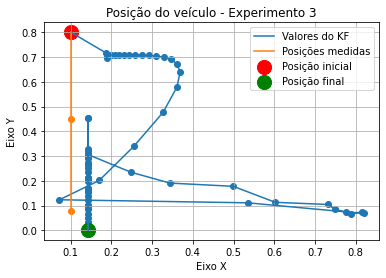

Erro absoluto - Eixo X: 0.04275521761917353
Erro absoluto - Eixo Y: 0.07646383353395063


In [89]:
valoresX = [0.1, 0.1, 0.1]
valoresY = [0.8, 0.45, 0.08]
plt.plot(posX, posY, label='Valores do KF')
plt.plot(valoresX, valoresY, label='Posições medidas')
plt.ylabel('Eixo Y')
plt.xlabel('Eixo X')
plt.title('Posição do veículo - Experimento 3')
plt.scatter(posX, posY)
plt.scatter(valoresX, valoresY)
plt.scatter(posX[0], posY[0], color='red', s=200, label='Posição inicial')
plt.scatter(posX[-1], posY[-1], color='green', s=200, label='Posição final')
plt.legend()
plt.grid()
plt.show()
print(f'Erro absoluto - Eixo X: {np.abs(valoresX[-1] - posX[-1])}')
print(f'Erro absoluto - Eixo Y: {np.abs(valoresY[-1] - posY[-1])}')

# Teste 4

In [90]:
distances = []
accel = []
gyros = []
df = []
dl = []
dr = []
arquivoDist = open("arqDist14.txt","r")
arquivoAc = open("arqAccel14.txt","r")
arquivoGyro = open("arqGyro14.txt","r")

for distPonteiro, acPonteiro, gyroPonteiro in zip(arquivoDist, arquivoAc, arquivoGyro):    
    arrDist = distPonteiro.split(";")
    distances.append([int(arrDist[0]) / 1000, int(arrDist[1]) / 1000, int(arrDist[2]) / 1000])
    accel.append(float(acPonteiro))
    gyros.append(-1 * float(gyroPonteiro))
    df.append(int(arrDist[0]) / 1000)
    dl.append(int(arrDist[1]) / 1000 + 0.07)
    dr.append(int(arrDist[2]) / 1000 + 0.07)
arquivoDist.close()
arquivoAc.close()
arquivoGyro.close()

data = {'Index': range(len(distances)), 'Aceleração': accel, 'Giro': gyros, 'Dist. Frontal': df, 'Dist. Esquerda': dl, 'Dist. Direita': dr}
dataframe = pd.DataFrame(data)
dataframe

,Index,Aceleração,Giro,Dist. Frontal,Dist. Esquerda,Dist. Direita
0,0,0.12,0.01,0.699,0.196,0.230
1,1,0.11,0.01,0.695,0.198,0.230
2,2,0.12,0.01,0.694,0.198,0.228
3,3,0.12,0.01,0.711,0.196,0.230
4,4,0.12,0.01,0.712,0.197,0.229
...,...,...,...,...,...,...
73,73,0.01,0.01,0.060,0.178,0.219
74,74,0.01,0.01,0.058,0.180,0.222
75,75,0.01,0.01,0.057,0.175,0.222
76,76,0.01,0.01,0.059,0.178,0.222


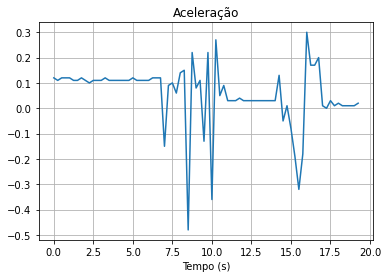

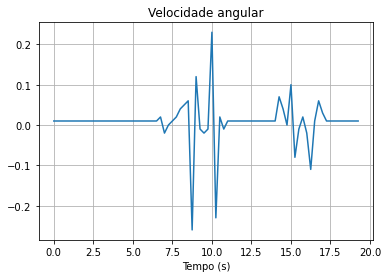

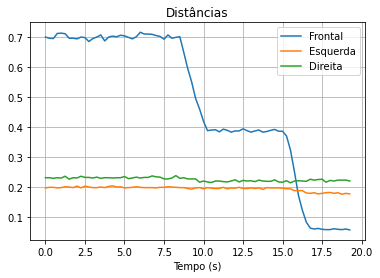

In [91]:
tempo = [x * 0.25 for x in dataframe['Index']]
plt.title('Aceleração')
plt.plot(tempo, dataframe['Aceleração'])
plt.grid()
plt.xlabel('Tempo (s)')
plt.show()

plt.title('Velocidade angular')
plt.plot(tempo, dataframe['Giro'])
plt.grid()
plt.xlabel('Tempo (s)')
plt.show()

plt.title('Distâncias')
plt.plot(tempo, dataframe['Dist. Frontal'], label = 'Frontal')
plt.plot(tempo, dataframe['Dist. Esquerda'], label = 'Esquerda')
plt.plot(tempo, dataframe['Dist. Direita'], label = 'Direita')
plt.grid()
plt.xlabel('Tempo (s)')
plt.legend()
plt.show()

In [92]:
P_atual = np.matrix([[0.1, 0.01, 0, 0, 0], [0.01, 0.1, 0, 0, 0], [0, 0, 0.1, 0, 0], [0, 0, 0, 0.1, 0], [0, 0, 0, 0, 0.1]])
posicao_atual = [0.75, 0.1, 0, 0, (3*np.pi)/2]
deltaT = 0.25
posX = [posicao_atual[0]]
posY = [posicao_atual[1]]
index = 0
for ac, gy, di in zip(accel, gyros, distances):
    index += 1
    print(f'Aceleração - {ac}\n')
    print(f'Giro - {gy}\n')
    print(f'Index: {index}\n')
    posicao_atual, P_atual = filtroDeKalman(posicao_atual, deltaT, [ac, gy], P_atual, di)
    print(f'Estado atual: {posicao_atual}')
    print("***********************************************************************\n\n")
    posX.append(posicao_atual[0])
    posY.append(posicao_atual[1])

Aceleração - 0.12

Giro - 0.01

Index: 1

Estado atual: [0.7068729336575017, 0.46525563311153584, -0.00026574873730666657, -0.1186737321999703, 4.705167547131963]
***********************************************************************


Aceleração - 0.11

Giro - 0.01

Index: 2

Estado atual: [0.706651282353908, 0.4940993469129337, -0.0006667197443475304, -0.14700918187007522, 4.7029524989069875]
***********************************************************************


Aceleração - 0.12

Giro - 0.01

Index: 3

Estado atual: [0.7063205637120619, 0.5308690508543024, -0.0014803681327917296, -0.17825209632689662, 4.698529667137965]
***********************************************************************


Aceleração - 0.12

Giro - 0.01

Index: 4

Estado atual: [0.7058051266997005, 0.5778985180470986, -0.0031510516739329916, -0.2102193384087488, 4.689706769888056]
***********************************************************************


Aceleração - 0.12

Giro - 0.01

Index: 5

Estado atual: 

Estado atual: [0.007382749611326345, 0.9499474042635447, 14.398009895435992, -1096.0151008164148, 1.7253368233838873]
***********************************************************************


Aceleração - 0.03

Giro - 0.01

Index: 53

Estado atual: [0.007382749611326345, 0.9499474042635447, 16.02507618666378, -1369.1077156648062, 1.7253368233838873]
***********************************************************************


Aceleração - 0.03

Giro - 0.01

Index: 54

Estado atual: [0.007382749611326345, 0.9499474042635447, 17.723066451010652, -1587.464828948886, 1.7253368233838873]
***********************************************************************


Aceleração - 0.03

Giro - 0.01

Index: 55

Estado atual: [0.007382749611326345, 0.9499474042635447, 19.468753614630614, -1745.497410322927, 1.7253368233838873]
***********************************************************************


Aceleração - 0.03

Giro - 0.01

Index: 56

Estado atual: [0.007382749611326345, 0.9499474042635447, 21.304

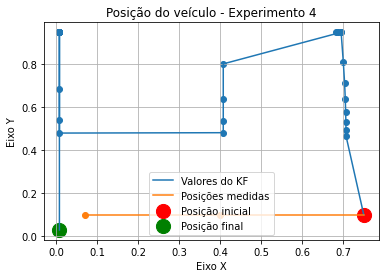

Erro absoluto - Eixo X: 0.06261725038867366
Erro absoluto - Eixo Y: 0.07026403644226895


In [93]:
valoresX = [0.75, 0.4, 0.07]
valoresY = [0.1, 0.1, 0.1]
plt.plot(posX, posY, label='Valores do KF')
plt.plot(valoresX, valoresY, label='Posições medidas')
plt.ylabel('Eixo Y')
plt.xlabel('Eixo X')
plt.title('Posição do veículo - Experimento 4')
plt.scatter(posX, posY)
plt.scatter(valoresX, valoresY)
plt.scatter(posX[0], posY[0], color='red', s=200, label='Posição inicial')
plt.scatter(posX[-1], posY[-1], color='green', s=200, label='Posição final')
plt.legend()
plt.grid()
plt.show()
print(f'Erro absoluto - Eixo X: {np.abs(valoresX[-1] - posX[-1])}')
print(f'Erro absoluto - Eixo Y: {np.abs(valoresY[-1] - posY[-1])}')

# Teste 5

In [94]:
distances = []
accel = []
gyros = []
df = []
dl = []
dr = []
arquivoDist = open("arqDist15.txt","r")
arquivoAc = open("arqAccel15.txt","r")
arquivoGyro = open("arqGyro15.txt","r")

for distPonteiro, acPonteiro, gyroPonteiro in zip(arquivoDist, arquivoAc, arquivoGyro):    
    arrDist = distPonteiro.split(";")
    distances.append([int(arrDist[0]) / 1000, int(arrDist[1]) / 1000, int(arrDist[2]) / 1000])
    accel.append(float(acPonteiro))
    gyros.append(-1 * float(gyroPonteiro))
    df.append(int(arrDist[0]) / 1000)
    dl.append(int(arrDist[1]) / 1000)
    dr.append(int(arrDist[2]) / 1000)
arquivoDist.close()
arquivoAc.close()
arquivoGyro.close()

data = {'Index': range(len(distances)), 'Aceleração': accel, 'Giro': gyros, 'Dist. Frontal': df, 'Dist. Esquerda': dl, 'Dist. Direita': dr}
dataframe = pd.DataFrame(data)
dataframe

,Index,Aceleração,Giro,Dist. Frontal,Dist. Esquerda,Dist. Direita
0,0,0.12,0.01,0.707,0.619,0.073
1,1,0.12,0.01,0.712,0.617,0.071
2,2,0.11,0.01,0.705,0.609,0.072
3,3,0.11,0.01,0.713,0.615,0.077
4,4,0.11,0.01,0.708,0.618,0.072
...,...,...,...,...,...,...
83,83,0.16,0.01,0.027,0.630,0.060
84,84,0.17,0.01,0.027,0.624,0.056
85,85,0.17,0.01,0.030,0.624,0.060
86,86,0.16,0.01,0.030,0.625,0.060


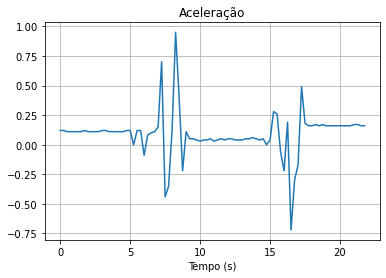

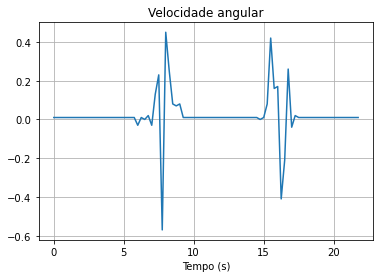

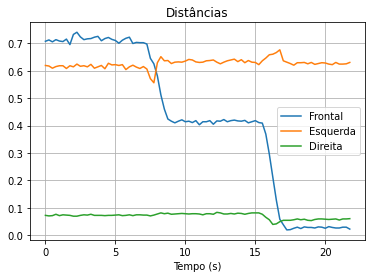

In [95]:
tempo = [x * 0.25 for x in dataframe['Index']]
plt.title('Aceleração')
plt.plot(tempo, dataframe['Aceleração'])
plt.grid()
plt.xlabel('Tempo (s)')
plt.show()

plt.title('Velocidade angular')
plt.plot(tempo, dataframe['Giro'])
plt.grid()
plt.xlabel('Tempo (s)')
plt.show()

plt.title('Distâncias')
plt.plot(tempo, dataframe['Dist. Frontal'], label = 'Frontal')
plt.plot(tempo, dataframe['Dist. Esquerda'], label = 'Esquerda')
plt.plot(tempo, dataframe['Dist. Direita'], label = 'Direita')
plt.grid()
plt.xlabel('Tempo (s)')
plt.legend()
plt.show()

In [96]:
P_atual = np.matrix([[0.1, 0, 0, 0, 0], [0, 0.1, 0.001, 0, 0], [0, 0, 0.1, 0, 0], [0, 0, 0, 0.1, 0], [0, 0, 0.1, 0, 0.1]])
posicao_atual = [0.9, 0.3, 0, 0, 0]
deltaT = 0.25
posX = [posicao_atual[0]]
posY = [posicao_atual[1]]
index = 0
for ac, gy, di in zip(accel, gyros, distances):
    index += 1
    if index <= 20:
        ac = ac - 0.1
    if index == 60:
        gy = gy + 0.01
    print(f'Aceleração - {ac}\n')
    print(f'Giro - {gy}\n')
    print(f'Index: {index}\n')
    posicao_atual, P_atual = filtroDeKalman(posicao_atual, deltaT, [ac, gy], P_atual, di)
    print(f'Estado atual: {posicao_atual}')
    print("***********************************************************************\n\n")
    posX.append(posicao_atual[0])
    posY.append(posicao_atual[1])

Aceleração - 0.01999999999999999

Giro - 0.01

Index: 1

Estado atual: [0.7787663215234425, 0.2935586802121896, -0.023672238654299783, -0.00015448148536915254, 0]
***********************************************************************


Aceleração - 0.01999999999999999

Giro - 0.01

Index: 2

Estado atual: [0.7729912014248328, 0.28827215220730457, -0.018731941707284674, -0.00018657381702040382, 0]
***********************************************************************


Aceleração - 0.009999999999999995

Giro - 0.01

Index: 3

Estado atual: [0.7684649014937623, 0.29481974840236497, -0.016050441200215794, -0.00022063368928527773, 0]
***********************************************************************


Aceleração - 0.009999999999999995

Giro - 0.01

Index: 4

Estado atual: [0.7689387536459763, 0.28710384979320397, -0.011883599587825765, -0.0002563453796942136, 0.0003239372955456169]
***********************************************************************


Aceleração - 0.0099999999999

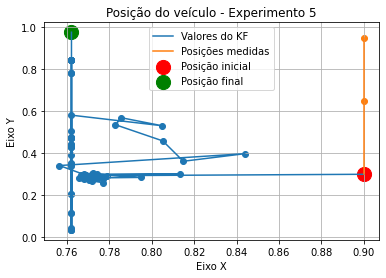

Erro absoluto - Eixo X: 0.13790211345873005
Erro absoluto - Eixo Y: 0.02500012660643114


In [97]:
valoresX = [0.9, 0.9, 0.9, 0.9]
valoresY = [0.3, 0.3, 0.65, 0.95]
plt.plot(posX, posY, label='Valores do KF')
plt.plot(valoresX, valoresY, label='Posições medidas')
plt.ylabel('Eixo Y')
plt.xlabel('Eixo X')
plt.title('Posição do veículo - Experimento 5')
plt.scatter(posX, posY)
plt.scatter(valoresX, valoresY)
plt.scatter(posX[0], posY[0], color='red', s=200, label='Posição inicial')
plt.scatter(posX[-1], posY[-1], color='green', s=200, label='Posição final')
plt.legend()
plt.grid()
plt.show()
print(f'Erro absoluto - Eixo X: {np.abs(valoresX[-1] - posX[-1])}')
print(f'Erro absoluto - Eixo Y: {np.abs(valoresY[-1] - posY[-1])}')

# Teste 6

In [98]:
distances = []
accel = []
gyros = []
df = []
dl = []
dr = []
arquivoDist = open("arqDist16.txt","r")
arquivoAc = open("arqAccel16.txt","r")
arquivoGyro = open("arqGyro16.txt","r")

for distPonteiro, acPonteiro, gyroPonteiro in zip(arquivoDist, arquivoAc, arquivoGyro):    
    arrDist = distPonteiro.split(";")
    distances.append([int(arrDist[0]) / 1000, int(arrDist[1]) / 1000, int(arrDist[2]) / 1000])
    accel.append(float(acPonteiro))
    gyros.append(-1 * float(gyroPonteiro))
    df.append(int(arrDist[0]) / 1000)
    dl.append(int(arrDist[1]) / 1000 + 0.07)
    dr.append(int(arrDist[2]) / 1000)
arquivoDist.close()
arquivoAc.close()
arquivoGyro.close()

data = {'Index': range(len(distances)), 'Aceleração': accel, 'Giro': gyros, 'Dist. Frontal': df, 'Dist. Esquerda': dl, 'Dist. Direita': dr}
dataframe = pd.DataFrame(data)
dataframe

,Index,Aceleração,Giro,Dist. Frontal,Dist. Esquerda,Dist. Direita
0,0,0.00,0.01,0.703,0.155,0.160
1,1,0.00,0.01,0.712,0.159,0.158
2,2,0.01,0.01,0.703,0.159,0.157
3,3,0.00,0.01,0.714,0.155,0.160
4,4,0.01,0.01,0.715,0.160,0.160
...,...,...,...,...,...,...
67,67,-0.23,0.01,0.051,0.154,0.164
68,68,0.05,0.01,0.057,0.155,0.164
69,69,0.06,0.01,0.055,0.160,0.164
70,70,0.06,0.01,0.056,0.158,0.167


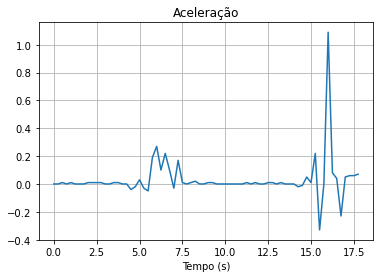

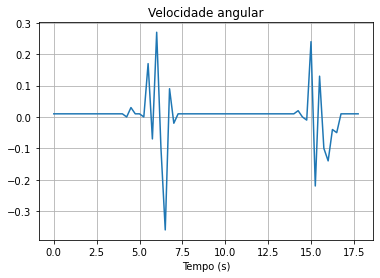

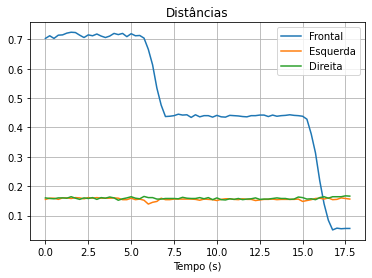

In [99]:
tempo = [x * 0.25 for x in dataframe['Index']]
plt.title('Aceleração')
plt.plot(tempo, dataframe['Aceleração'])
plt.grid()
plt.xlabel('Tempo (s)')
plt.show()

plt.title('Velocidade angular')
plt.plot(tempo, dataframe['Giro'])
plt.grid()
plt.xlabel('Tempo (s)')
plt.show()

plt.title('Distâncias')
plt.plot(tempo, dataframe['Dist. Frontal'], label = 'Frontal')
plt.plot(tempo, dataframe['Dist. Esquerda'], label = 'Esquerda')
plt.plot(tempo, dataframe['Dist. Direita'], label = 'Direita')
plt.grid()
plt.xlabel('Tempo (s)')
plt.legend()
plt.show()

In [100]:
P_atual = np.matrix([[0.1, 0, 0, 0, 0], [0, 0.1, 0, 0, 0], [0, 0, 0.1, 0, 0], [0, 0, 0, 0.1, 0], [0, 0, 0, 0, 0.1]])
posicao_atual = [0.3, 0.9, 0, 0, np.pi/2]
deltaT = 0.25
posX = [posicao_atual[0]]
posY = [posicao_atual[1]]
index = 0
for ac, gy, di in zip(accel, gyros, distances):
    index += 1   
    print(f'Aceleração - {ac}\n')
    print(f'Giro - {gy}\n')
    print(f'Index: {index}\n')
    posicao_atual, P_atual = filtroDeKalman(posicao_atual, deltaT, [ac, gy], P_atual, di)
    print(f'Estado atual: {posicao_atual}')
    print("***********************************************************************\n\n")
    posX.append(posicao_atual[0])
    posY.append(posicao_atual[1])

Aceleração - 0.0

Giro - 0.01

Index: 1

Estado atual: [0.297259198142985, 0.5538012500305807, 1.7134976671671322e-06, -0.08145849849302193, 1.5635380026965384]
***********************************************************************


Aceleração - 0.0

Giro - 0.01

Index: 2

Estado atual: [0.29733332069273166, 0.530597298287507, 1.7086529127519132e-06, -0.08235349241184858, 1.561285235206243]
***********************************************************************


Aceleração - 0.01

Giro - 0.01

Index: 3

Estado atual: [0.29744667851607126, 0.5062377267211136, 3.677137402764968e-05, -0.0811851653422389, 1.5567861210922842]
***********************************************************************


Aceleração - 0.0

Giro - 0.01

Index: 4

Estado atual: [0.2975863501537229, 0.4791742948024117, 6.555291290539472e-05, -0.08330919703719551, 1.5478078666445527]
***********************************************************************


Aceleração - 0.01

Giro - 0.01

Index: 5

Estado atual: [0.

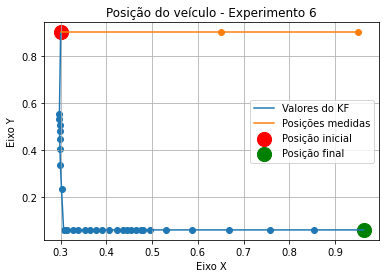

Erro absoluto - Eixo X: 0.012994657289447487
Erro absoluto - Eixo Y: 0.8382269634820809


In [101]:
valoresX = [0.3, 0.3, 0.65, 0.95]
valoresY = [0.9, 0.9, 0.9, 0.9]
plt.plot(posX, posY, label='Valores do KF')
plt.plot(valoresX, valoresY, label='Posições medidas')
plt.ylabel('Eixo Y')
plt.xlabel('Eixo X')
plt.title('Posição do veículo - Experimento 6')
plt.scatter(posX, posY)
plt.scatter(valoresX, valoresY)
plt.scatter(posX[0], posY[0], color='red', s=200, label='Posição inicial')
plt.scatter(posX[-1], posY[-1], color='green', s=200, label='Posição final')
plt.legend()
plt.grid()
plt.show()
print(f'Erro absoluto - Eixo X: {np.abs(valoresX[-1] - posX[-1])}')
print(f'Erro absoluto - Eixo Y: {np.abs(valoresY[-1] - posY[-1])}')

# Teste 7

In [102]:
distances = []
accel = []
gyros = []
df = []
dl = []
dr = []
arquivoDist = open("arqDist17.txt","r")
arquivoAc = open("arqAccel17.txt","r")
arquivoGyro = open("arqGyro17.txt","r")

for distPonteiro, acPonteiro, gyroPonteiro in zip(arquivoDist, arquivoAc, arquivoGyro):    
    arrDist = distPonteiro.split(";")
    distances.append([int(arrDist[0]) / 1000, int(arrDist[1]) / 1000, int(arrDist[2]) / 1000])
    accel.append(float(acPonteiro))
    gyros.append(-1 * float(gyroPonteiro))
    df.append(int(arrDist[0]) / 1000)
    dl.append(int(arrDist[1]) / 1000)
    dr.append(int(arrDist[2]) / 1000)
arquivoDist.close()
arquivoAc.close()
arquivoGyro.close()

data = {'Index': range(len(distances)), 'Aceleração': accel, 'Giro': gyros, 'Dist. Frontal': df, 'Dist. Esquerda': dl, 'Dist. Direita': dr}
dataframe = pd.DataFrame(data)
dataframe

,Index,Aceleração,Giro,Dist. Frontal,Dist. Esquerda,Dist. Direita
0,0,-0.01,0.01,0.683,0.075,0.464
1,1,-0.01,0.01,0.675,0.080,0.458
2,2,-0.01,0.01,0.674,0.075,0.464
3,3,-0.01,0.01,0.668,0.078,0.463
4,4,-0.00,0.01,0.688,0.077,0.459
...,...,...,...,...,...,...
66,66,0.00,-0.00,0.057,0.068,0.454
67,67,0.00,-0.00,0.058,0.068,0.453
68,68,0.00,-0.00,0.058,0.068,0.452
69,69,0.00,-0.00,0.058,0.071,0.454


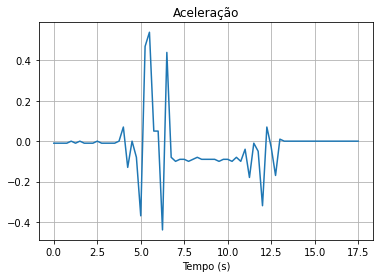

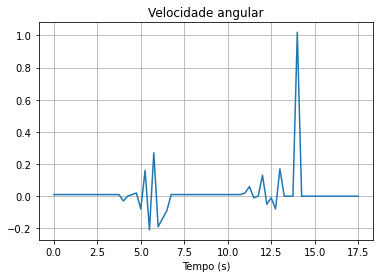

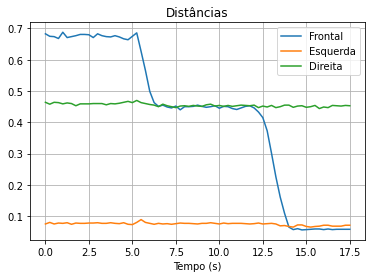

In [103]:
tempo = [x * 0.25 for x in dataframe['Index']]
plt.title('Aceleração')
plt.plot(tempo, dataframe['Aceleração'])
plt.grid()
plt.xlabel('Tempo (s)')
plt.show()

plt.title('Velocidade angular')
plt.plot(tempo, dataframe['Giro'])
plt.grid()
plt.xlabel('Tempo (s)')
plt.show()

plt.title('Distâncias')
plt.plot(tempo, dataframe['Dist. Frontal'], label = 'Frontal')
plt.plot(tempo, dataframe['Dist. Esquerda'], label = 'Esquerda')
plt.plot(tempo, dataframe['Dist. Direita'], label = 'Direita')
plt.grid()
plt.xlabel('Tempo (s)')
plt.legend()
plt.show()

In [104]:
P_atual = np.matrix([[0.01, 0.01, 0, 0, 0], [0.01, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 0, 1]])
posicao_atual = [0.9, 0.8, 0, 0, np.pi]
deltaT = 0.25
posX = [posicao_atual[0]]
posY = [posicao_atual[1]]
index = 0
for ac, gy, di in zip(accel, gyros, distances):
    index += 1
    print(f'Aceleração - {ac}\n')
    print(f'Giro - {gy}\n')
    print(f'Index: {index}\n')
    posicao_atual, P_atual = filtroDeKalman(posicao_atual, deltaT, [ac, gy], P_atual, di)
    print(f'Estado atual: {posicao_atual}')
    print("***********************************************************************\n\n")
    posX.append(posicao_atual[0])
    posY.append(posicao_atual[1])

Aceleração - -0.01

Giro - 0.01

Index: 1

Estado atual: [0.7077764851300985, 0.6840141187024924, 0.6633316930550451, -8.893398175232467e-05, 3.0836354659908958]
***********************************************************************


Aceleração - -0.01

Giro - 0.01

Index: 2

Estado atual: [0.5187409906236078, 0.688984388185207, 0.7118103169788563, -0.0004578803197348582, 3.032276912482044]
***********************************************************************


Aceleração - -0.01

Giro - 0.01

Index: 3

Estado atual: [0.30806587512417744, 0.6988169135491923, 0.761959235755175, -0.0013373269788800317, 2.9337150277427324]
***********************************************************************


Aceleração - -0.01

Giro - 0.01

Index: 4

Estado atual: [0.08255253931132908, 0.7160187805027532, 0.8151621647979983, -0.0033214264178375247, 2.750886391517262]
***********************************************************************


Aceleração - -0.0

Giro - 0.01

Index: 5

Estado atual: [0

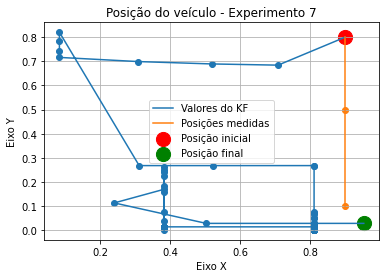

Erro absoluto - Eixo X: 0.052928854320734575
Erro absoluto - Eixo Y: 0.07089769172846275


In [105]:
valoresX = [0.9, 0.9, 0.9, 0.9]
valoresY = [0.8, 0.8, 0.5, 0.1]
plt.plot(posX, posY, label='Valores do KF')
plt.plot(valoresX, valoresY, label='Posições medidas')
plt.ylabel('Eixo Y')
plt.xlabel('Eixo X')
plt.title('Posição do veículo - Experimento 7')
plt.scatter(posX, posY)
plt.scatter(valoresX, valoresY)
plt.scatter(posX[0], posY[0], color='red', s=200, label='Posição inicial')
plt.scatter(posX[-1], posY[-1], color='green', s=200, label='Posição final')
plt.legend()
plt.grid()
plt.show()
print(f'Erro absoluto - Eixo X: {np.abs(valoresX[-1] - posX[-1])}')
print(f'Erro absoluto - Eixo Y: {np.abs(valoresY[-1] - posY[-1])}')

# Teste 8

In [106]:
distances = []
accel = []
gyros = []
df = []
dl = []
dr = []
arquivoDist = open("arqDist18.txt","r")
arquivoAc = open("arqAccel18.txt","r")
arquivoGyro = open("arqGyro18.txt","r")

for distPonteiro, acPonteiro, gyroPonteiro in zip(arquivoDist, arquivoAc, arquivoGyro):    
    arrDist = distPonteiro.split(";")
    distances.append([int(arrDist[0]) / 1000, int(arrDist[1]) / 1000, int(arrDist[2]) / 1000])
    accel.append(float(acPonteiro))
    gyros.append(-1 * float(gyroPonteiro))
    df.append(int(arrDist[0]) / 1000)
    dl.append(int(arrDist[1]) / 1000)
    dr.append(int(arrDist[2]) / 1000)
arquivoDist.close()
arquivoAc.close()
arquivoGyro.close()

data = {'Index': range(len(distances)), 'Aceleração': accel, 'Giro': gyros, 'Dist. Frontal': df, 'Dist. Esquerda': dl, 'Dist. Direita': dr}
dataframe = pd.DataFrame(data)
dataframe

,Index,Aceleração,Giro,Dist. Frontal,Dist. Esquerda,Dist. Direita
0,0,0.19,0.01,0.721,0.514,0.079
1,1,0.19,0.01,0.726,0.511,0.076
2,2,0.18,0.01,0.713,0.508,0.079
3,3,0.18,0.01,0.720,0.508,0.080
4,4,0.20,0.01,0.723,0.505,0.076
...,...,...,...,...,...,...
79,79,0.20,0.01,0.044,0.449,0.122
80,80,0.20,0.01,0.043,0.460,0.120
81,81,0.20,0.01,0.044,0.463,0.122
82,82,0.20,0.01,0.044,0.459,0.118


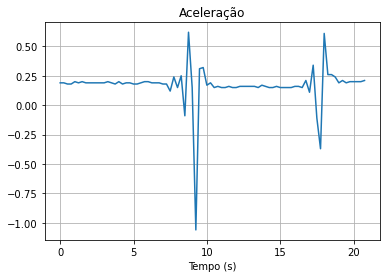

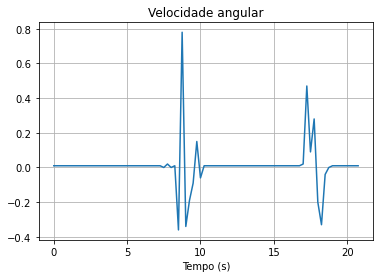

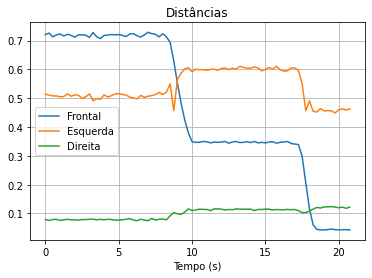

In [107]:
tempo = [x * 0.25 for x in dataframe['Index']]
plt.title('Aceleração')
plt.plot(tempo, dataframe['Aceleração'])
plt.grid()
plt.xlabel('Tempo (s)')
plt.show()

plt.title('Velocidade angular')
plt.plot(tempo, dataframe['Giro'])
plt.grid()
plt.xlabel('Tempo (s)')
plt.show()

plt.title('Distâncias')
plt.plot(tempo, dataframe['Dist. Frontal'], label = 'Frontal')
plt.plot(tempo, dataframe['Dist. Esquerda'], label = 'Esquerda')
plt.plot(tempo, dataframe['Dist. Direita'], label = 'Direita')
plt.grid()
plt.xlabel('Tempo (s)')
plt.legend()
plt.show()

In [108]:
P_atual = np.matrix([[0.1, 0, 0, 0, 0], [0.01, 0.1, 0, 0, 0], [0, 0, 0.1, 0, 0], [0, 0, 0, 0.1, 0], [0, 0, 0, 0, 0.1]])
posicao_atual = [0.8, 0.9, 0, 0, 3*np.pi/2]
deltaT = 0.25
posX = [posicao_atual[0]]
posY = [posicao_atual[1]]
index = 0
for ac, gy, di in zip(accel, gyros, distances):
    index += 1
    print(f'Aceleração - {ac}\n')
    print(f'Giro - {gy}\n')
    print(f'Index: {index}\n')
    posicao_atual, P_atual = filtroDeKalman(posicao_atual, deltaT, [ac, gy], P_atual, di)
    print(f'Estado atual: {posicao_atual}')
    print("***********************************************************************\n\n")
    posX.append(posicao_atual[0])
    posY.append(posicao_atual[1])

Aceleração - 0.19

Giro - 0.01

Index: 1

Estado atual: [0.728188503106683, 0.7251175039643462, -0.00020206960943764638, -0.009438213692609637, 4.709079495302621]
***********************************************************************


Aceleração - 0.19

Giro - 0.01

Index: 2

Estado atual: [0.7278992491597575, 0.7217843923666168, -0.00031752792854078144, -0.05702419734455371, 4.710770394684949]
***********************************************************************


Aceleração - 0.18

Giro - 0.01

Index: 3

Estado atual: [0.7133815871396147, 0.7146285061070385, -0.0008235280212630348, -0.09734851659977557, 4.709432360418579]
***********************************************************************


Aceleração - 0.18

Giro - 0.01

Index: 4

Estado atual: [0.7132241052950448, 0.7334725031875002, -0.0009286094581829474, -0.1423945325015918, 4.711475863019802]
***********************************************************************


Aceleração - 0.2

Giro - 0.01

Index: 5

Estado atual: 

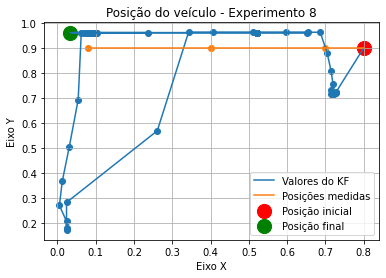

Erro absoluto - Eixo X: 0.046448773050734735
Erro absoluto - Eixo Y: 0.06079429165405548


In [109]:
valoresX = [0.8, 0.7, 0.4, 0.08]
valoresY = [0.9, 0.9, 0.9, 0.9]
plt.plot(posX, posY, label='Valores do KF')
plt.plot(valoresX, valoresY, label='Posições medidas')
plt.ylabel('Eixo Y')
plt.xlabel('Eixo X')
plt.title('Posição do veículo - Experimento 8')
plt.scatter(posX, posY)
plt.scatter(valoresX, valoresY)
plt.scatter(posX[0], posY[0], color='red', s=200, label='Posição inicial')
plt.scatter(posX[-1], posY[-1], color='green', s=200, label='Posição final')
plt.legend()
plt.grid()
plt.show()
print(f'Erro absoluto - Eixo X: {np.abs(valoresX[-1] - posX[-1])}')
print(f'Erro absoluto - Eixo Y: {np.abs(valoresY[-1] - posY[-1])}')